# Task Description

This visualization is dedicated to answer the following question:

What is the trend of Win-Ratio value between “Pittsburgh Penguins” and “Washington Capitals” from 1974 to 2023 years? Does the high Win-Ratio value lead to the highest possible achievement (for NHL this is “Stanley Trophy “)?

In [1]:
# Import Section
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from matplotlib.ticker import MultipleLocator
from scipy.interpolate import make_interp_spline

In [2]:
path_add = [r"https://www.hockeydb.com/stte/anaheim-ducks-4643.html",
            r"https://www.hockeydb.com/stte/atlanta-flames-4680.html",
            r"https://www.hockeydb.com/stte/atlanta-thrashers-4682.html",
            r"https://www.hockeydb.com/stte/boston-bruins-4919.html",
            r"https://www.hockeydb.com/stte/new-york-islanders-7085.html",
            r"https://www.hockeydb.com/stte/buffalo-sabres-5054.html",
            r"https://www.hockeydb.com/stte/calgary-flames-5090.html",
            r"https://www.hockeydb.com/stte/chicago-blackhawks-5218.html",
            r"https://www.hockeydb.com/stte/columbus-blue-jackets-5316.html",
            r"https://www.hockeydb.com/stte/dallas-stars-5404.html",
            r"https://www.hockeydb.com/stte/colorado-rockies-5313.html",
            r"https://www.hockeydb.com/stte/colorado-avalanche-5307.html",
            r"https://www.hockeydb.com/stte/detroit-red-wings-5492.html",
            r"https://www.hockeydb.com/stte/new-jersey-devils-7066.html",
            r"https://www.hockeydb.com/stte/edmonton-oilers-5632.html",
            r"https://www.hockeydb.com/stte/hartford-whalers-6045.html",
            r"https://www.hockeydb.com/stte/vegas-golden-knights-11894.html",
            r"https://www.hockeydb.com/stte/los-angeles-kings-6664.html",
            r"https://www.hockeydb.com/stte/florida-panthers-5763.html",
            r"https://www.hockeydb.com/stte/minnesota-north-stars-6876.html",
            r"https://www.hockeydb.com/stte/montreal-canadiens-6929.html",
            r"https://www.hockeydb.com/stte/nashville-predators-7024.html",
            r"https://www.hockeydb.com/stte/new-york-rangers-7089.html",
            r"https://www.hockeydb.com/stte/ottawa-senators-7328.html",
            r"https://www.hockeydb.com/stte/philadelphia-flyers-7439.html",
            r"https://www.hockeydb.com/stte/phoenix-coyotes-7450.html",
            r"https://www.hockeydb.com/stte/quebec-nordiques-7584.html",
            r"https://www.hockeydb.com/stte/carolina-hurricanes-5154.html",
            r"https://www.hockeydb.com/stte/san-jose-sharks-7877.html"
            r"https://www.hockeydb.com/stte/seattle-kraken-12884.html",
            r"https://www.hockeydb.com/stte/st.-louis-blues-8187.html",
            r"https://www.hockeydb.com/stte/minnesota-wild-6879.html",
            r"https://www.hockeydb.com/stte/tampa-bay-lightning-8385.html",
            r"https://www.hockeydb.com/stte/toronto-maple-leafs-8490.html",
            r"https://www.hockeydb.com/stte/new-york-islanders-7085.html",
            r"https://www.hockeydb.com/stte/vancouver-canucks-8756.html",
            r"https://www.hockeydb.com/stte/winnipeg-jets-9024.html",
            r"https://www.hockeydb.com/stte/winnipeg-jets-10675.html",
            r"https://www.hockeydb.com/stte/pittsburgh-penguins-7475.html",
            r"https://www.hockeydb.com/stte/washington-capitals-8871.html"]

In [3]:
# Downloading all required data
session_obj = requests.Session()
all_data = []
for path in path_add:
    response = session_obj.get(path, headers={"User-Agent": "Mozilla/5.0"})
    all_data.append(pd.read_html(response.content)[0])

len(all_data)

39

In [7]:
# Merge all data together
full_df = all_data[0]
for i in range(1, len(all_data)):
    full_df = pd.concat([full_df, all_data[i]])

# Converting Season into integers
full_df["Season"] = full_df["Season"].map(lambda x: int(x[:4]))

# Selecting data in focus
data_in_focus = full_df[full_df["Season"] >= 1974]

# Creating Win Ratio columns
data_in_focus = data_in_focus.assign(Win_ratio=list(data_in_focus["W"]/(data_in_focus["W"] + data_in_focus["L"] + data_in_focus["T"])))

# Reseting index
data_in_focus = data_in_focus.reset_index().drop("index", axis=1)

# Absolute MAX MIN and MEAN value of Win Ratio for the Seasons (all teams)
win_ratio_full = data_in_focus.groupby("Season")["Win_ratio"].max().reset_index()
win_ratio_full.rename(columns={"Win_ratio" : "Max"}, inplace=True)
mean = data_in_focus.groupby("Season")["Win_ratio"].mean().reset_index()["Win_ratio"]
min = data_in_focus.groupby("Season")["Win_ratio"].min().reset_index()["Win_ratio"]
win_ratio_full = win_ratio_full.assign(Mean=mean)
win_ratio_full = win_ratio_full.assign(Min=min)

# Select data for "Pittsburgh Penguins" and "Washington Capitals"
df_penguins = data_in_focus[data_in_focus["Team"] == "Pittsburgh Penguins"]
df_capitals = data_in_focus[data_in_focus["Team"] == "Washington Capitals"]

# Select data for "Pittsburgh Penguins" and "Washington Capitals" related to Stanley Cup winning
stanley_cup_penguins = df_penguins[df_penguins["Result"] == "Won Championship"]
stanley_cup_capitals = df_capitals[df_capitals["Result"] == "Won Championship"]

In [17]:
# Spline for Peguins
xnew = np.linspace(df_penguins["Season"].min(), df_penguins["Season"].max(), 300)
spline = make_interp_spline(df_penguins["Season"][:-1], df_penguins["Win_ratio"][:-1], bc_type="not-a-knot")
y_new = spline(xnew)

# Spline for Capitals
spline1 = make_interp_spline(df_capitals["Season"][:-1], df_capitals["Win_ratio"][:-1])
y_new1 = spline1(xnew)

# Spline for Win Ratio Max, Mean and Min:
spline_max = make_interp_spline(win_ratio_full["Season"], win_ratio_full["Max"])
spline_mean = make_interp_spline(win_ratio_full["Season"], win_ratio_full["Mean"])
spline_min = make_interp_spline(win_ratio_full["Season"], win_ratio_full["Min"])
y_spline_max = spline_max(xnew)
y_spline_mean = spline_mean(xnew)
y_spline_min = spline_min(xnew)

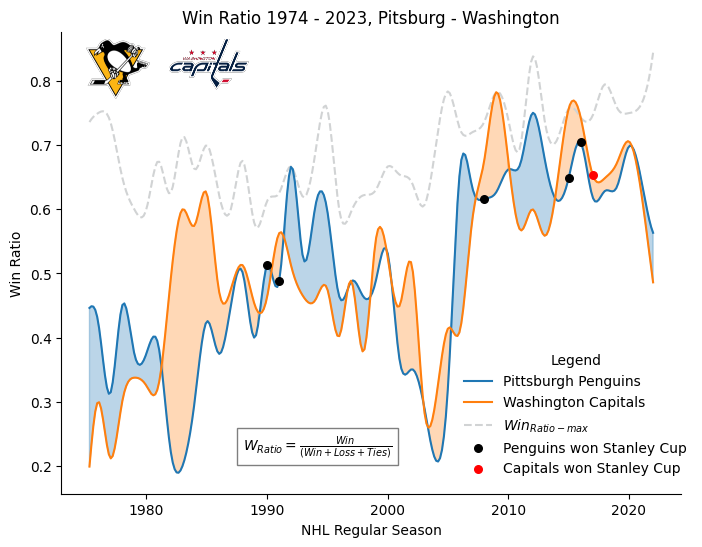

In [18]:
# Plot Figure
fig, ax = plt.subplots(figsize=(8,6))
plt.plot(xnew[8:], y_new[8:], label="Pittsburgh Penguins", zorder=2)
plt.plot(xnew[8:], y_new1[8:], label="Washington Capitals", zorder=2);
ax.fill_between(xnew[8:], y_new[8:], y_new1[8:], where=(y_new[8:] > y_new1[8:]), color='C0', alpha=0.3)
ax.fill_between(xnew[8:], y_new[8:], y_new1[8:], where=(y_new[8:] < y_new1[8:]), color='C1', alpha=0.3)
# Max Ratio line
plt.plot(xnew[8:], y_spline_max[8:], "--", c="#d1d3d4", label="$Win_{Ratio - max}$", zorder=1);

# Stanley Cup markers
plt.scatter(stanley_cup_penguins["Season"],
            stanley_cup_penguins["Win_ratio"],
            s=30, c="black", label="Penguins won Stanley Cup",
            zorder=3)
plt.scatter(stanley_cup_capitals["Season"],
            stanley_cup_capitals["Win_ratio"],
            s=30, c="red", label="Capitals won Stanley Cup",
            zorder=3);

# Set frames' visibility
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adding legend
# plt.legend(loc=4, frameon=False, title='Legend')
plt.legend(bbox_to_anchor=(0.63,0.33), frameon=False, title='Legend');


# Adding description
plt.xlabel("NHL Regular Season");
plt.ylabel("Win Ratio");

# Adding Annotation
ax.text(1988, 0.23, r"$W_{Ratio} =\frac{Win}{(Win + Loss + Ties)}$",
        va='center', ha="left", bbox=dict(facecolor="w",alpha=0.5))

# Adding Title
ax.set_title("Win Ratio 1974 - 2023, Pitsburg - Washington")

# Load the logo images
logo_pinguins = plt.imread("./Pittsburgh_Penguins_logo_(2016).svg.png") 
logo_capitals = plt.imread("./Washington_Capitals.svg.png") 

# Adding logo images on plot - 0.135,0.75 - position, 0.12,0.12 - size
pinguins_pic = fig.add_axes([0.135,0.768,0.1,0.1], anchor='NE', zorder=1)
# pinguins_pic = fig.add_axes([0.73,0.3,0.12,0.12], anchor='NE', zorder=1)
pinguins_pic.imshow(logo_pinguins)
pinguins_pic.axis('off')
capitals_pic = fig.add_axes([0.26,0.768,0.1,0.1], anchor='NE', zorder=1)
# capitals_pic = fig.add_axes([0.73,0.18,0.12,0.12], anchor='NE', zorder=1)
capitals_pic.imshow(logo_capitals)
capitals_pic.axis('off');
